## 1. Load data

In [1]:
from process import *

data = load_data(DatasetDirectory.PENGUINS)

## 2. Prepare the datasets

In [2]:
data_preprocessing(data, DatasetDirectory.PENGUINS)

In [3]:
X = data.drop('species', axis=1)
y = data['species']

In [4]:
from sklearn.preprocessing import LabelEncoder
le_species = LabelEncoder()
y = le_species.fit_transform(y)

### 2.1. Shuffle and split dataset

In [5]:
subsets = []
ratios = [0.4, 0.6, 0.8, 0.9] 

In [6]:
for ratio in ratios:
    feature_train, label_train, feature_test, label_test = prepare_dataset_v2(data, ratio, 1-ratio, DatasetDirectory.PENGUINS)
    subsets.append((feature_train, label_train, feature_test, label_test))

### 2.2. Visualize the class distributions

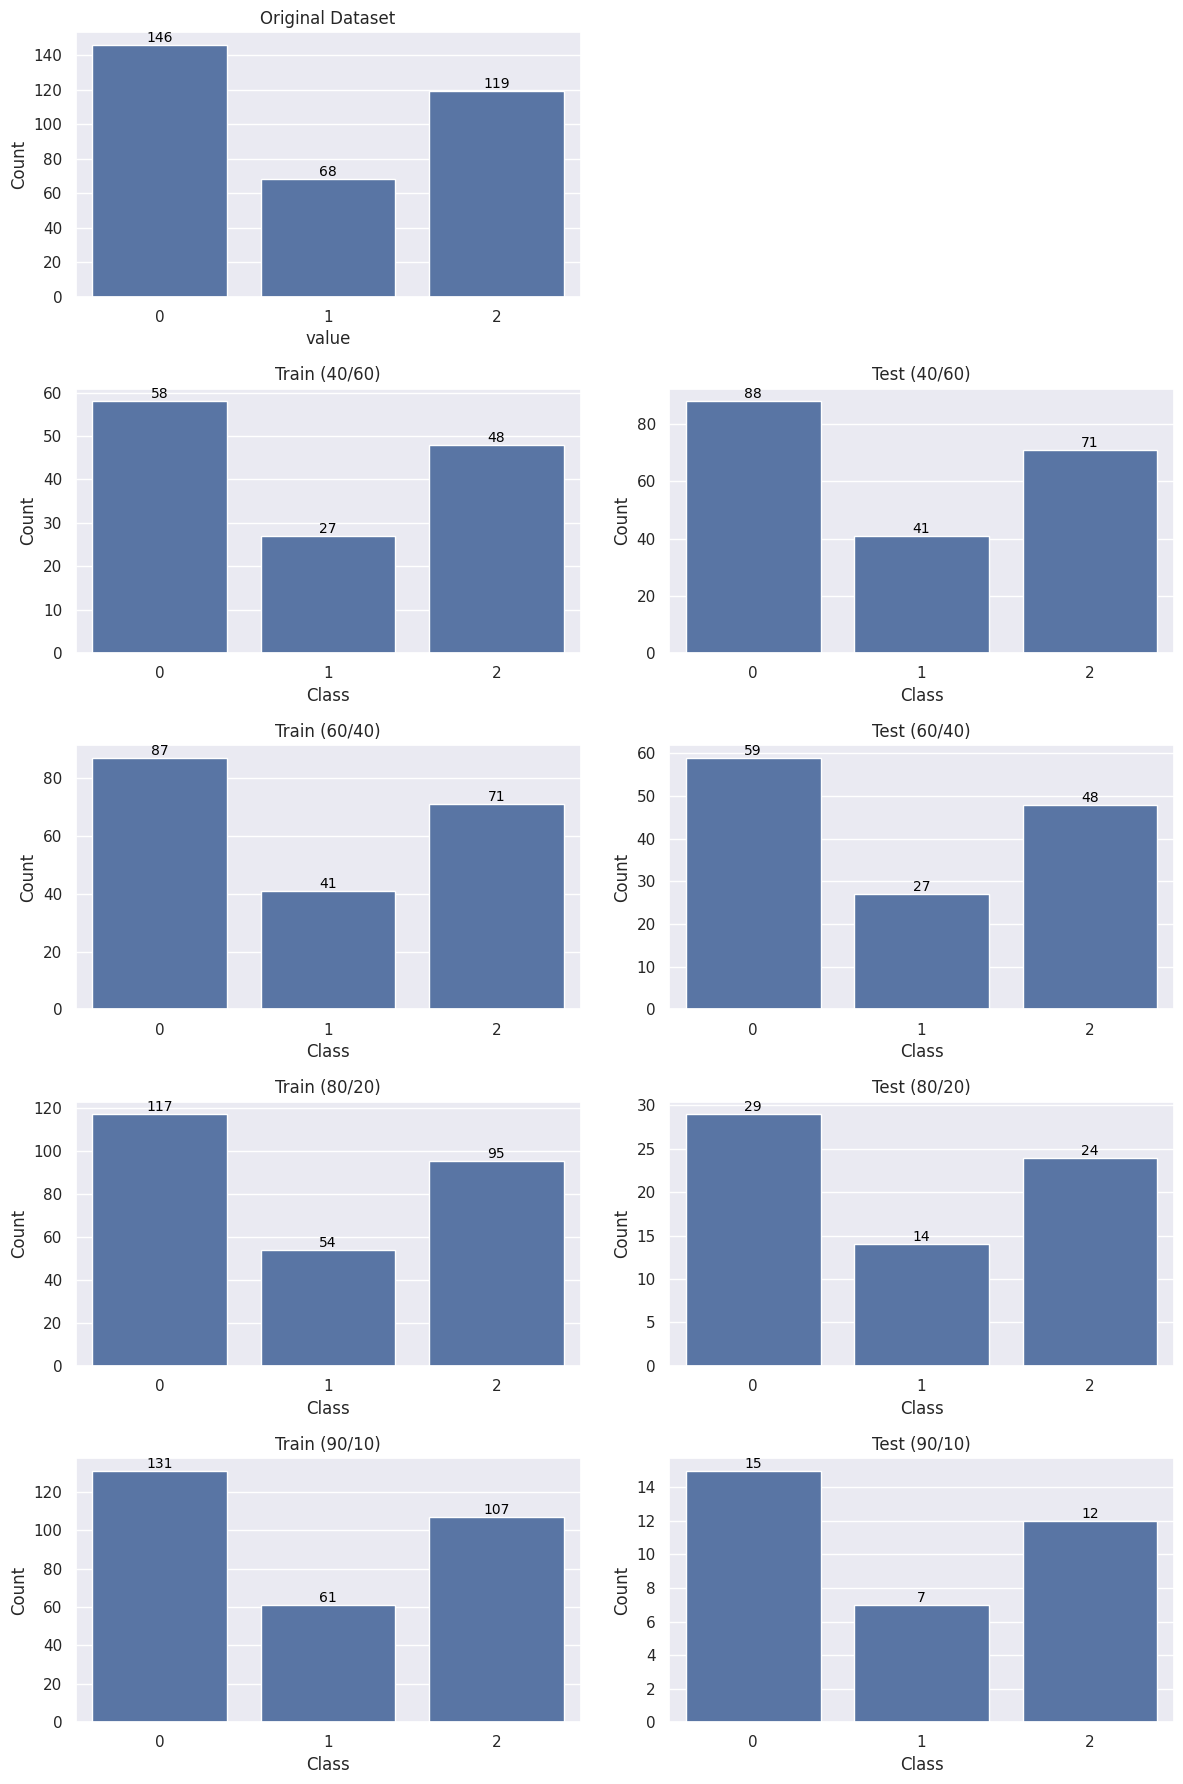

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, 18))
sns.set(style="darkgrid")

plt.subplot(5, 2, 1)
ax = sns.countplot(x=y)  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.title('Original Dataset')
plt.ylabel('Count')
plt.xlabel('value')
plt.subplot(5, 2, 2)
plt.axis('off')

for i, ratio in enumerate(ratios): 
    eature_train, label_train, feature_test, label_test = subsets[i]

    plt.subplot(5, 2, 2*(i+1) + 1)
    ax1 = sns.countplot(x=label_train)
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')
    plt.title(f'Train ({round(ratio*100)}/{round((1-ratio)*100)})')
    plt.ylabel('Count')
    plt.xlabel('Class')
    
    plt.subplot(5, 2, 2*(i+1) + 2)
    ax2 = sns.countplot(x=label_test)
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')
    plt.title(f'Test ({round(ratio*100)}/{round((1-ratio)*100)})')
    plt.ylabel('Count')
    plt.xlabel('Class')

plt.tight_layout()
plt.show()

## 3. Build the decision tree classifier

### 3.1 Build the model

In [8]:
from sklearn.tree import DecisionTreeClassifier

clfs = {}
label_preds = {}

for idx, ratio in enumerate(ratios):
    feature_train, label_train, feature_test, label_test = subsets[idx]

    clf = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=None)
    clf.fit(feature_train, label_train)

    y_pred = clf.predict(feature_test)

    clfs[ratio] = clf
    label_preds[ratio] = y_pred

### 3.2 Visualize the dicision tree

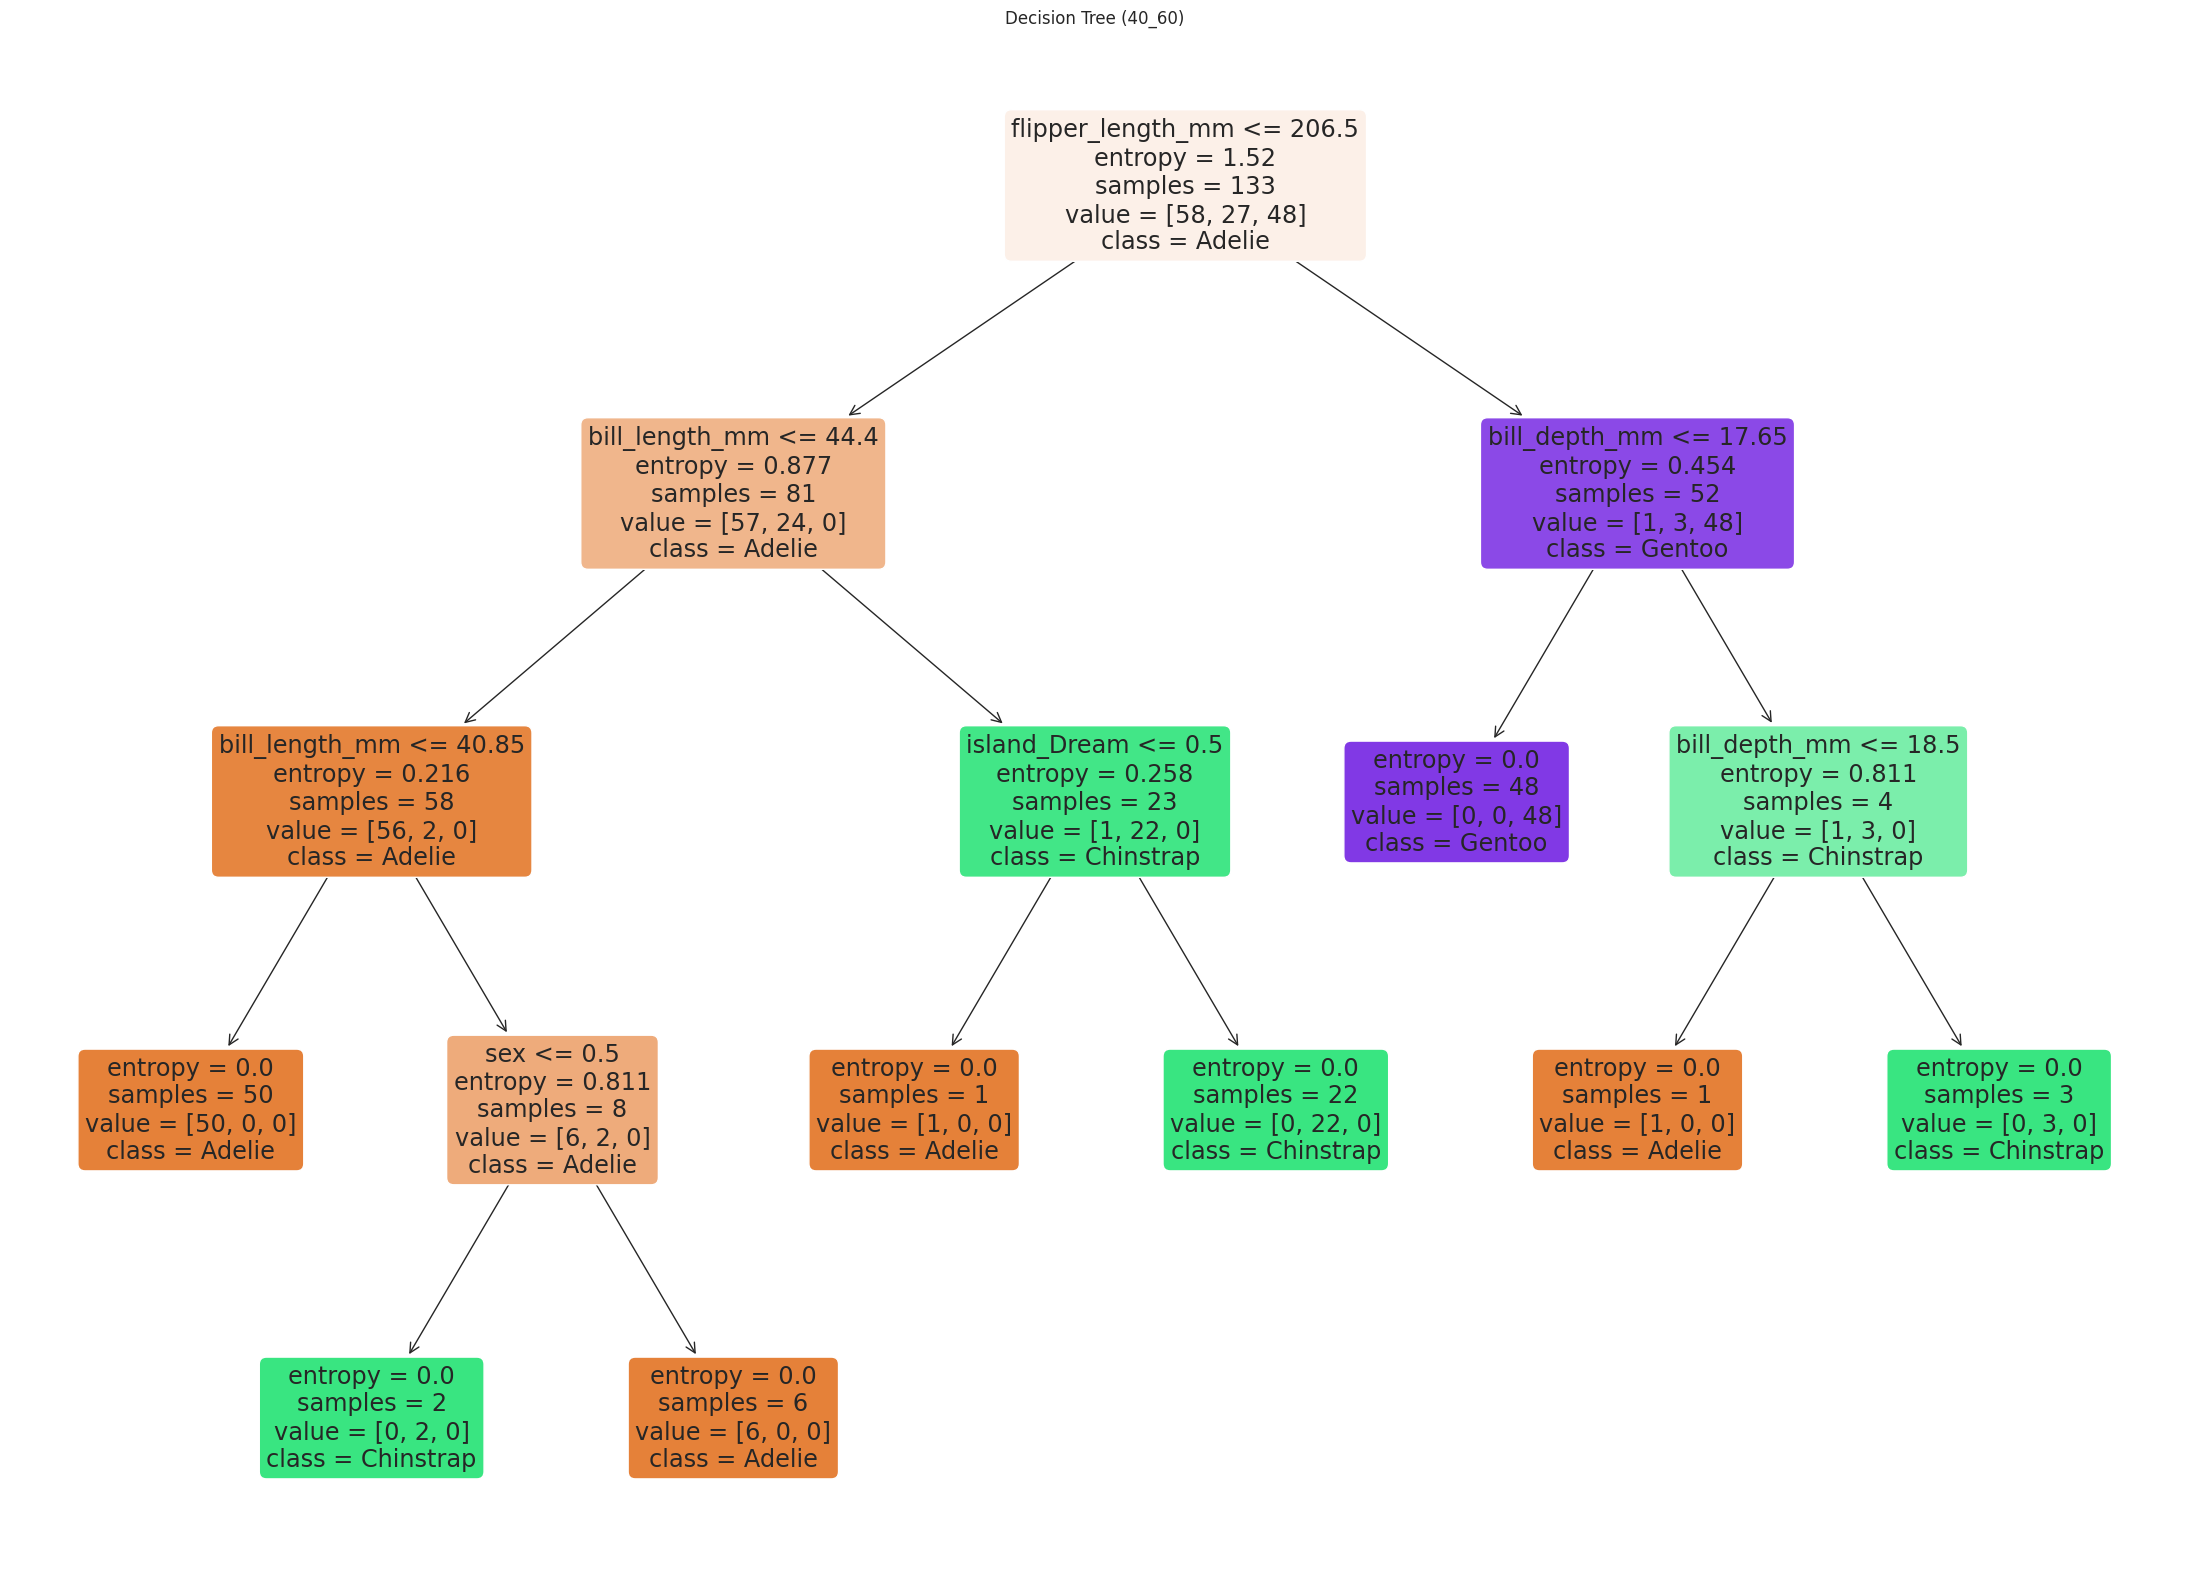

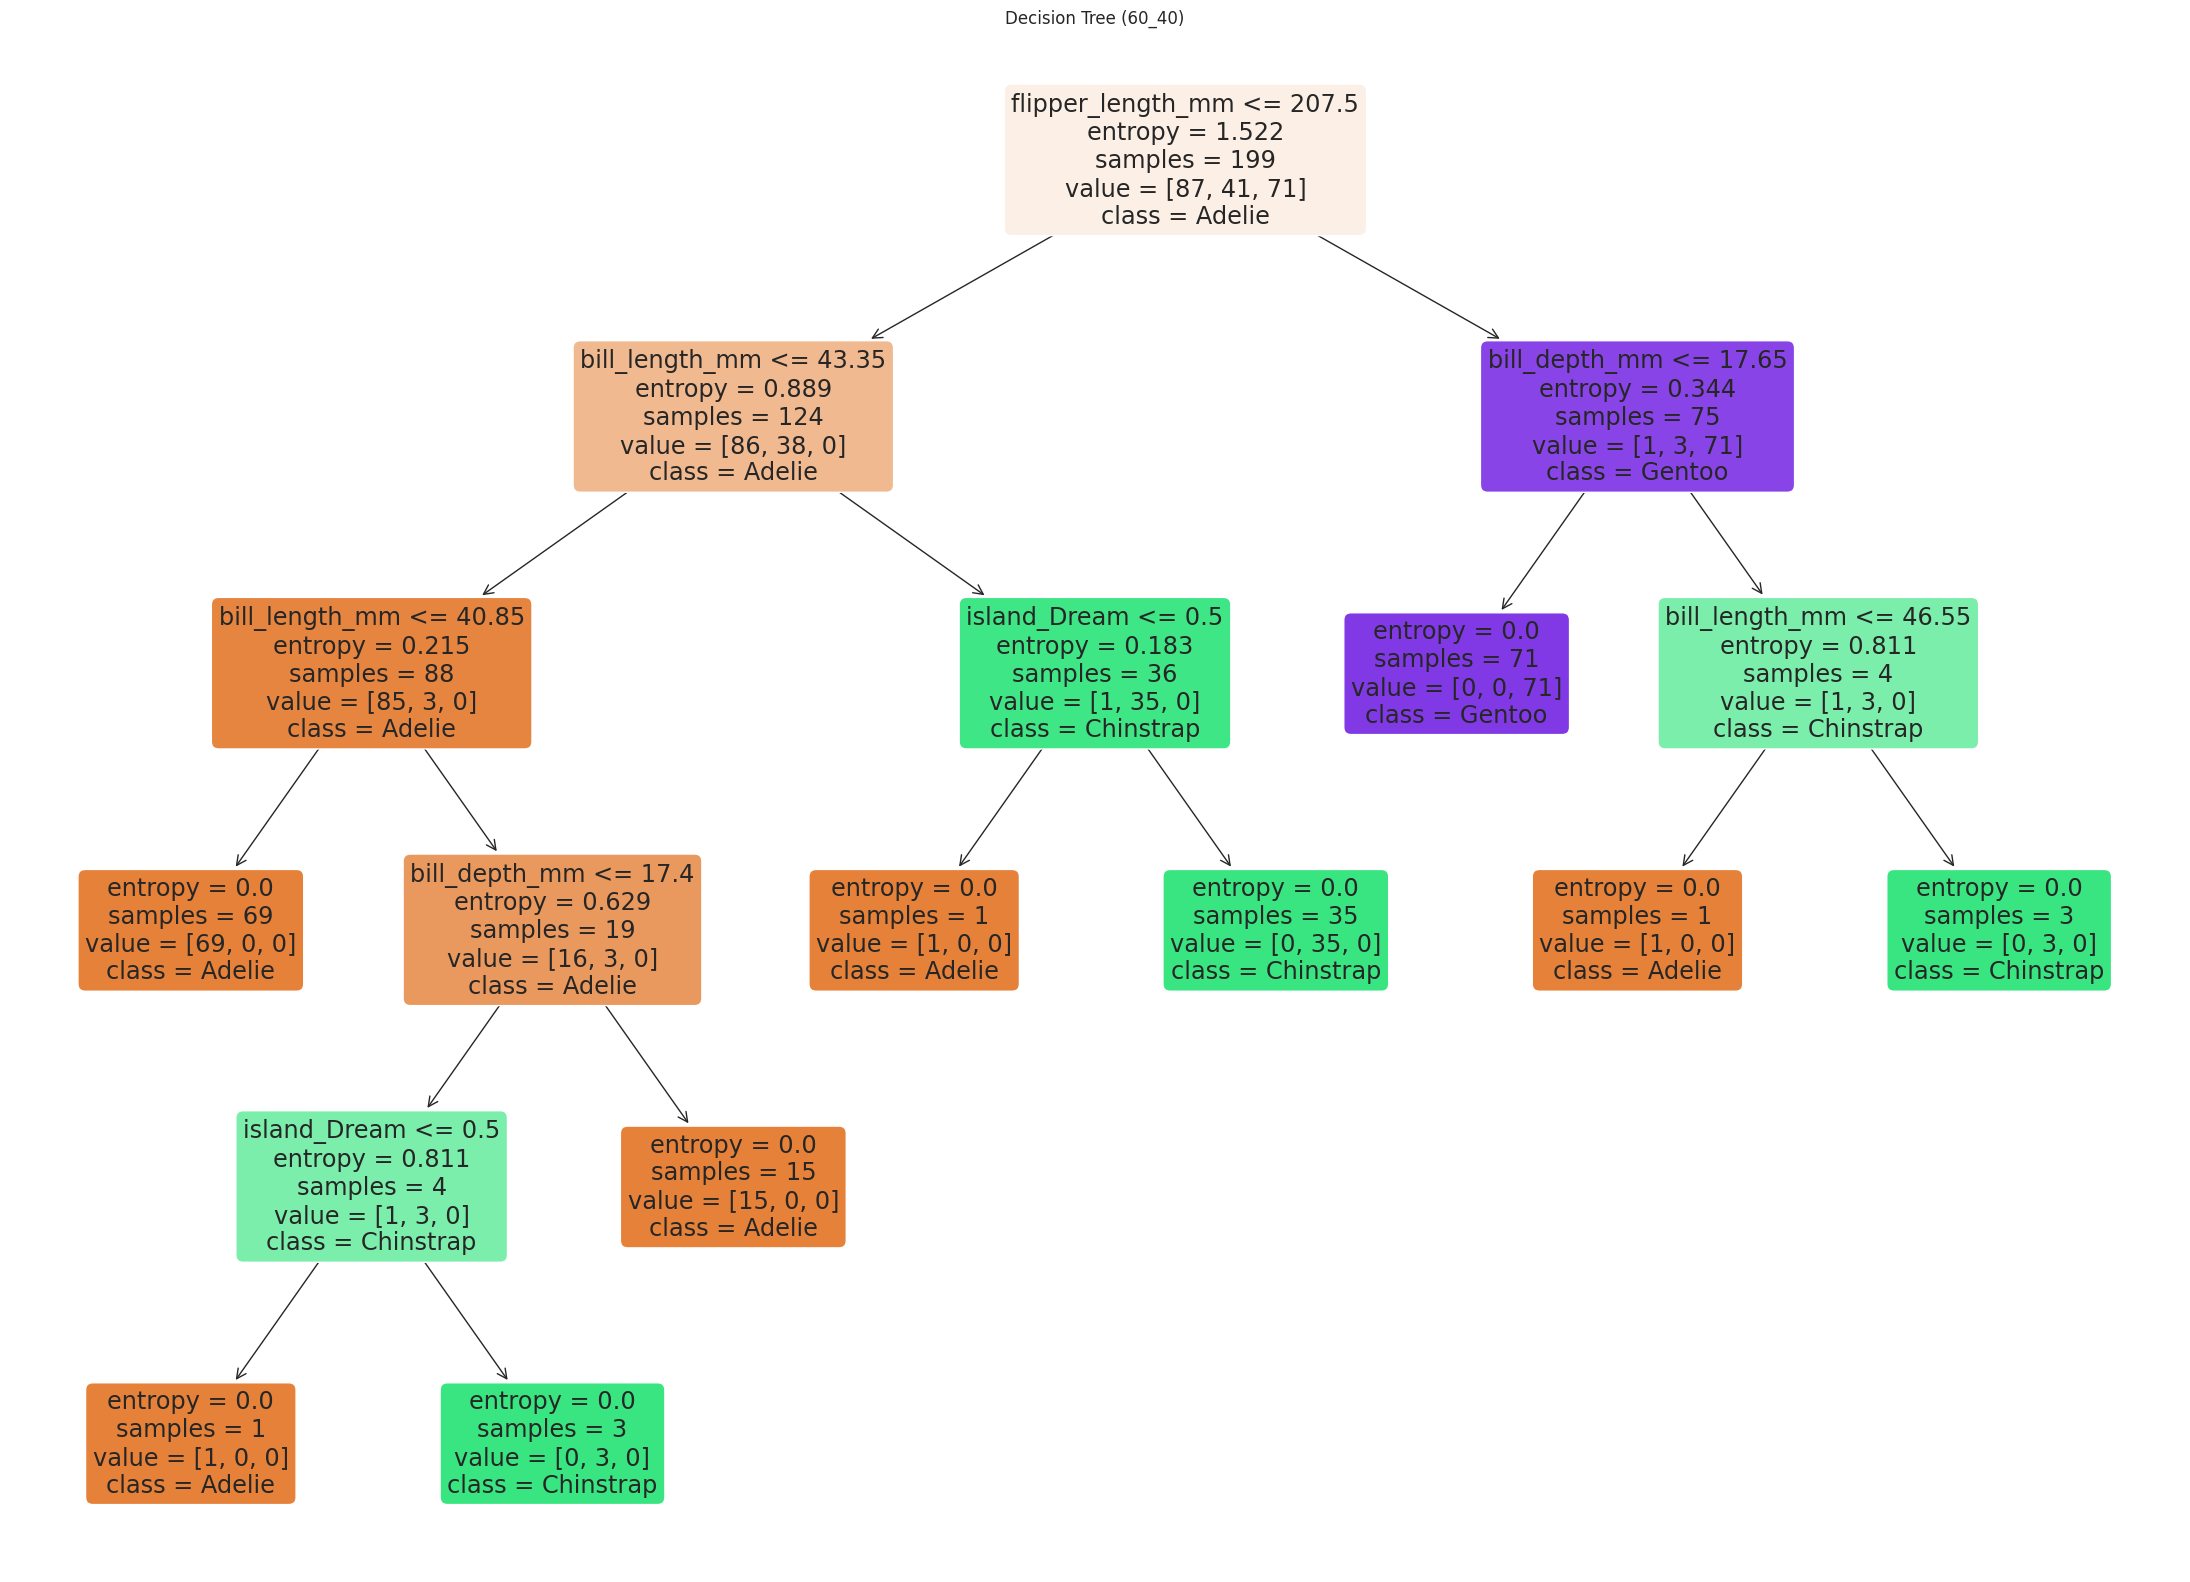

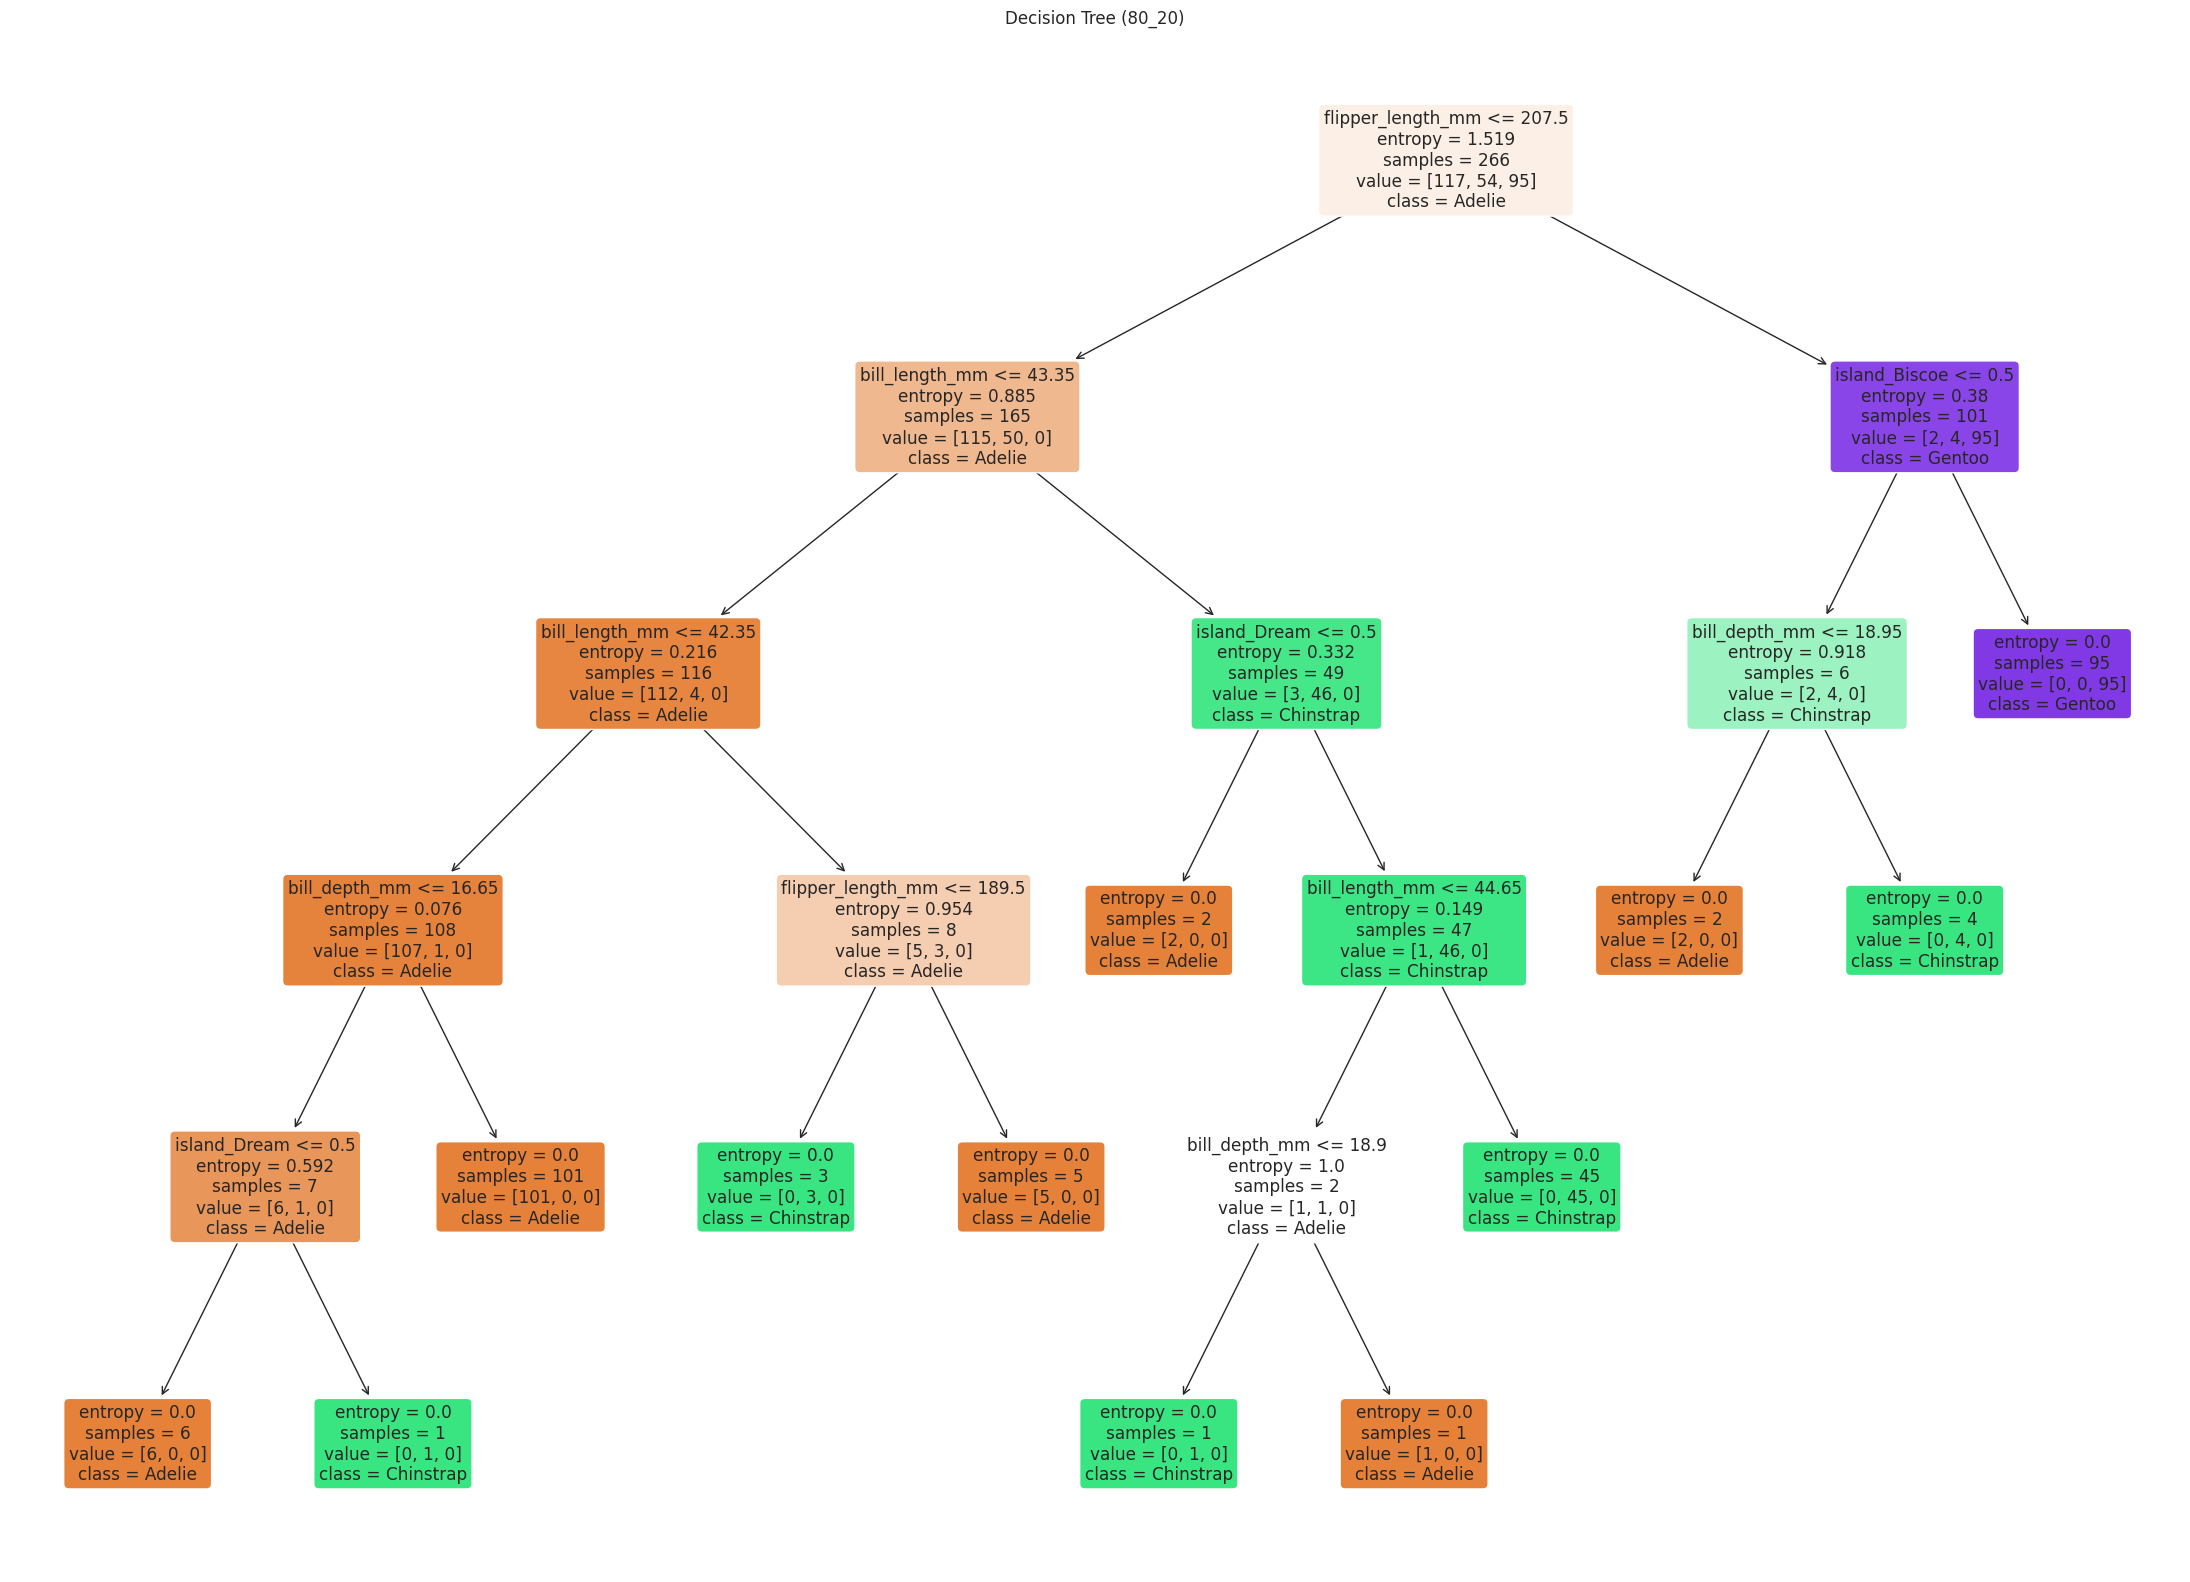

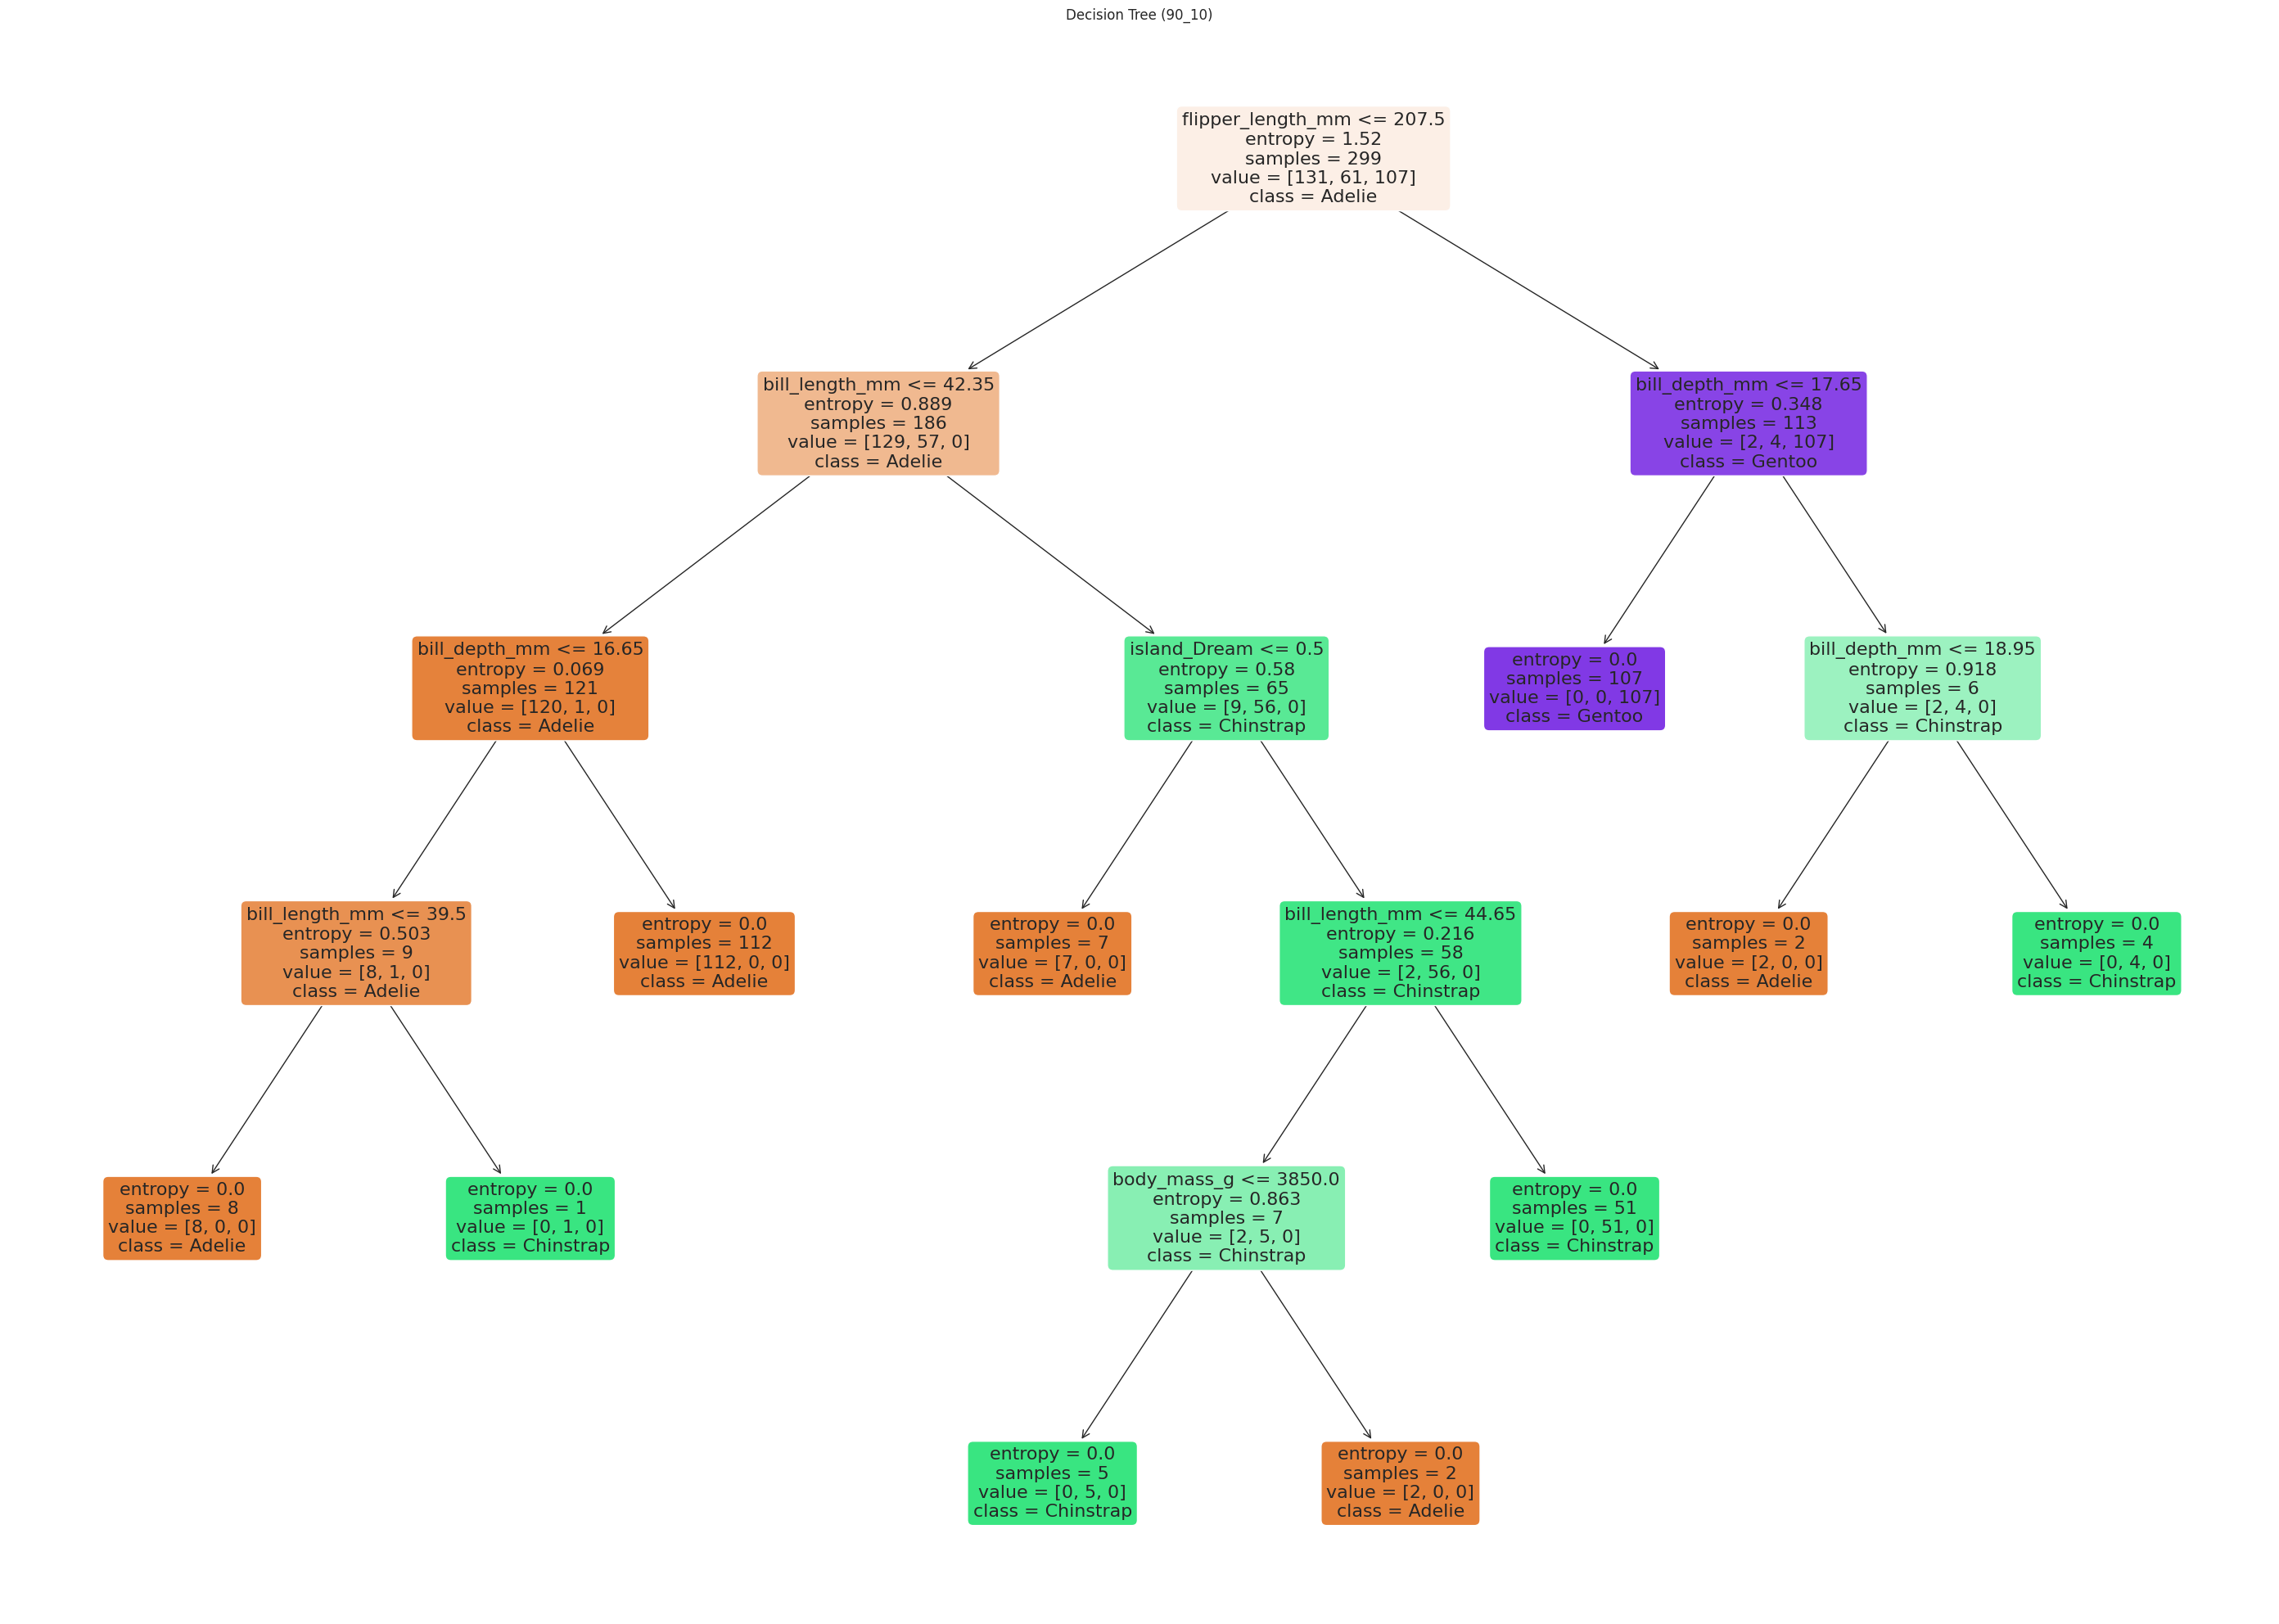

In [9]:
import graphviz
from sklearn import tree
import os
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

outputRatio_dir = os.path.join(os.getcwd(), "png", "penguins", "ratio")
os.makedirs(outputRatio_dir, exist_ok=True)

for ratio, clf in clfs.items():
    ratio_str = f"{round(ratio*100)}_{round((1 - ratio)*100)}"

    plt.figure(figsize=(28, 20))
    plot_tree(
        clf,
        feature_names=X.columns.tolist(),
        class_names=['Adelie', 'Chinstrap', 'Gentoo'],
        filled=True,
        rounded=True
    )
    plt.title(f"Decision Tree ({ratio_str})")

    dot_data = tree.export_graphviz(
        clf,
        out_file=None,
        feature_names=X.columns.tolist(),
        class_names=[str(cls) for cls in le_species.classes_],
        filled=True,
        rounded=True,
        special_characters=True
    )

    graph = graphviz.Source(dot_data)
    name_ratio = f"penguins_tree_{ratio_str}"
    graph.render(filename=os.path.join(outputRatio_dir, name_ratio), format='png', cleanup=True)

plt.tight_layout()
plt.show()


## 4. Evaluate the decision tree classifier

=== 40/60 ===
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.99      0.95      0.97        88
   Chinstrap       0.91      1.00      0.95        41
      Gentoo       1.00      0.99      0.99        71

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

Confusion Matrix:
[[84  4  0]
 [ 0 41  0]
 [ 1  0 70]]


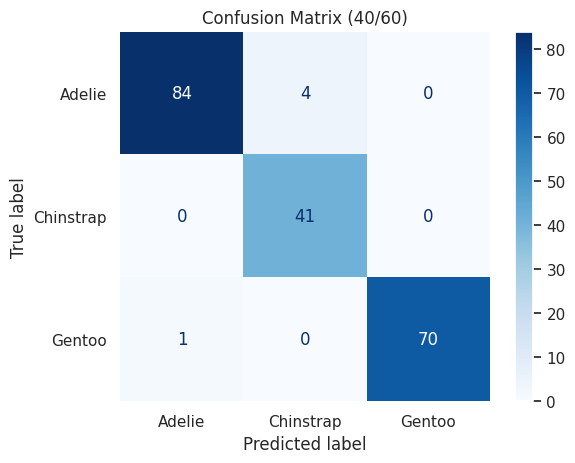

=== 60/40 ===
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.98      0.97        59
   Chinstrap       0.96      1.00      0.98        27
      Gentoo       1.00      0.96      0.98        48

    accuracy                           0.98       134
   macro avg       0.98      0.98      0.98       134
weighted avg       0.98      0.98      0.98       134

Confusion Matrix:
[[58  1  0]
 [ 0 27  0]
 [ 2  0 46]]


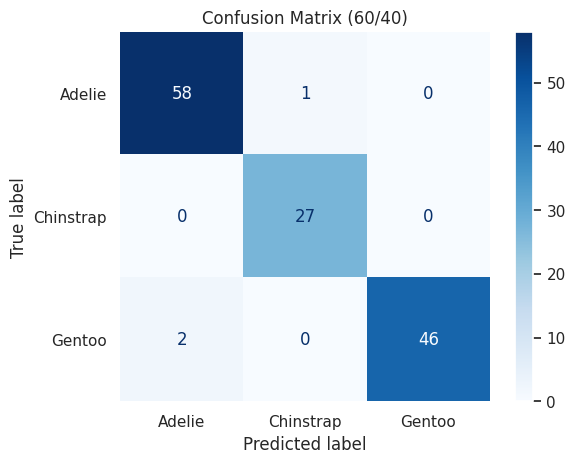

=== 80/20 ===
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67

Confusion Matrix:
[[26  3  0]
 [ 0 14  0]
 [ 2  0 22]]


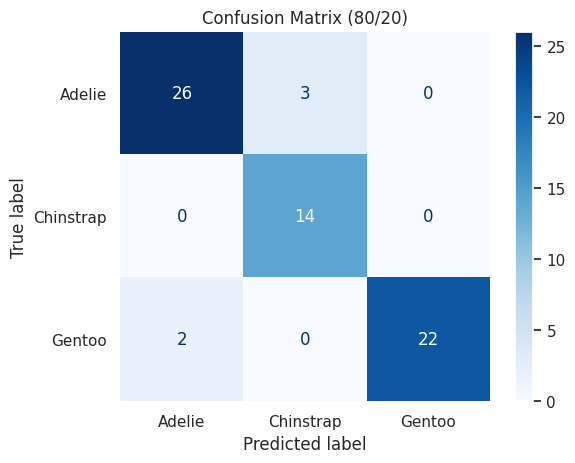

=== 90/10 ===
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.88      1.00      0.94        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      0.83      0.91        12

    accuracy                           0.94        34
   macro avg       0.96      0.94      0.95        34
weighted avg       0.95      0.94      0.94        34

Confusion Matrix:
[[15  0  0]
 [ 0  7  0]
 [ 2  0 10]]


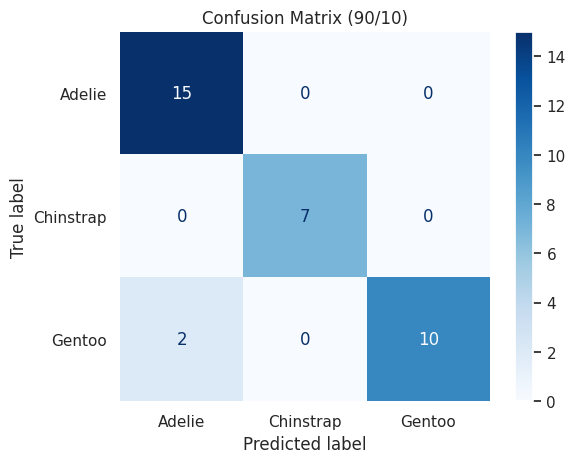

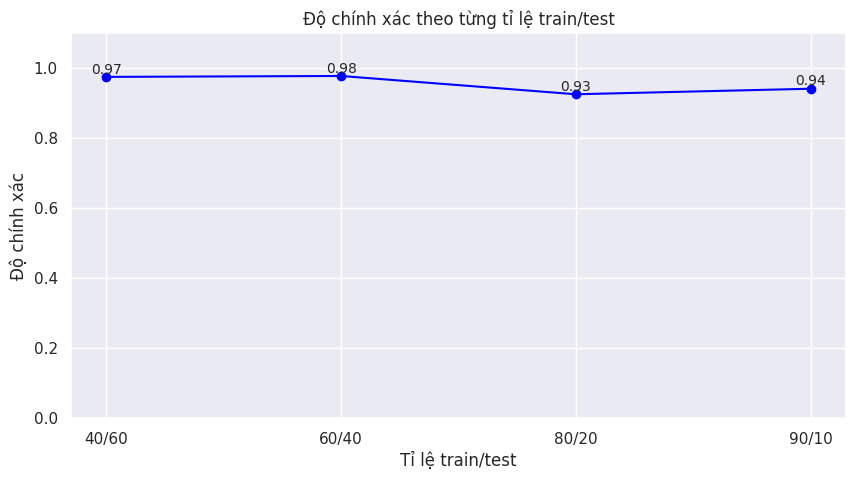

In [10]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

accuracies = {}

for idx, ratio in enumerate(ratios):
    clf = clfs[ratio]
    y_pred = label_preds[ratio]
    label_test = subsets[idx][3]

    acc = accuracy_score(label_test, y_pred)
    accuracies[ratio] = acc

    print(f"=== {round(ratio * 100)}/{round((1 - ratio) * 100)} ===")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(label_test, y_pred, target_names=['Adelie', 'Chinstrap', 'Gentoo']))
    
    print("Confusion Matrix:")
    print(confusion_matrix(label_test, label_preds[ratio]))

    disp = ConfusionMatrixDisplay.from_predictions(
        label_test, y_pred,
        display_labels=['Adelie', 'Chinstrap', 'Gentoo'],
        cmap='Blues',
        colorbar=True
    )
    disp.ax_.set_title(f"Confusion Matrix ({round(ratio * 100)}/{round((1 - ratio) * 100)})")

    for spine in disp.ax_.spines.values():
        spine.set_visible(False)
    disp.ax_.grid(False)

    plt.show()

# Vẽ biểu đồ độ chính xác
accuracy_values = [accuracies[ratio] for ratio in ratios]
ratio_labels = [f"{round(r * 100)}/{round((1 - r) * 100)}" for r in ratios]

plt.figure(figsize=(10, 5))
plt.plot(ratio_labels, accuracy_values, marker='o', linestyle='-', color='blue')
plt.title('Độ chính xác theo từng tỉ lệ train/test')
plt.xlabel('Tỉ lệ train/test')
plt.ylabel('Độ chính xác')
plt.ylim(0, 1.1)
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)
plt.grid(True)
plt.show()



## 5. The depth and accuracy of a decision tree

In [11]:
feature_train, label_train, feature_test, label_test = subsets[2]  # 80/20 split

depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

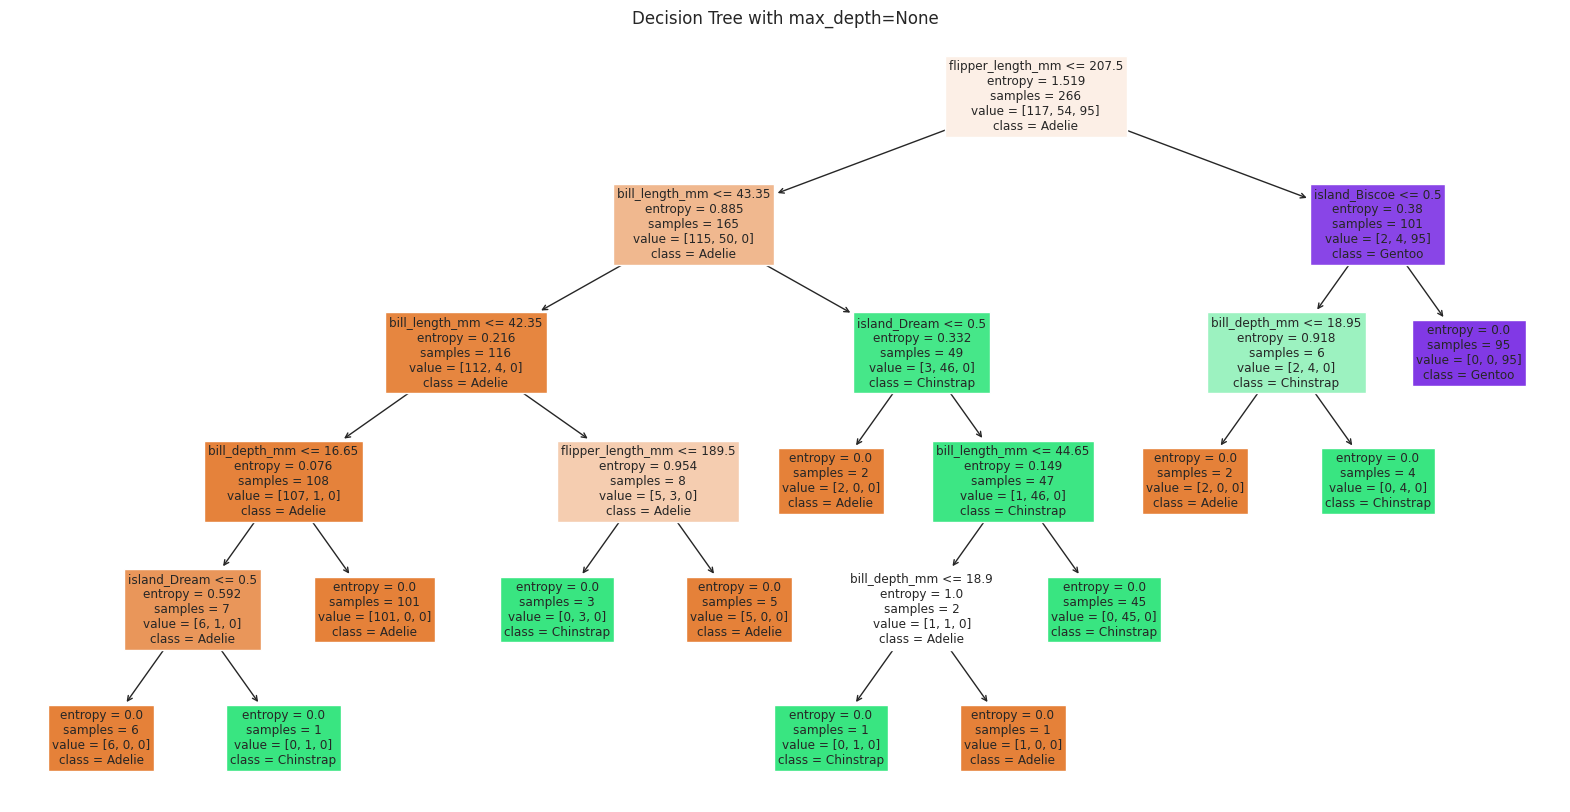

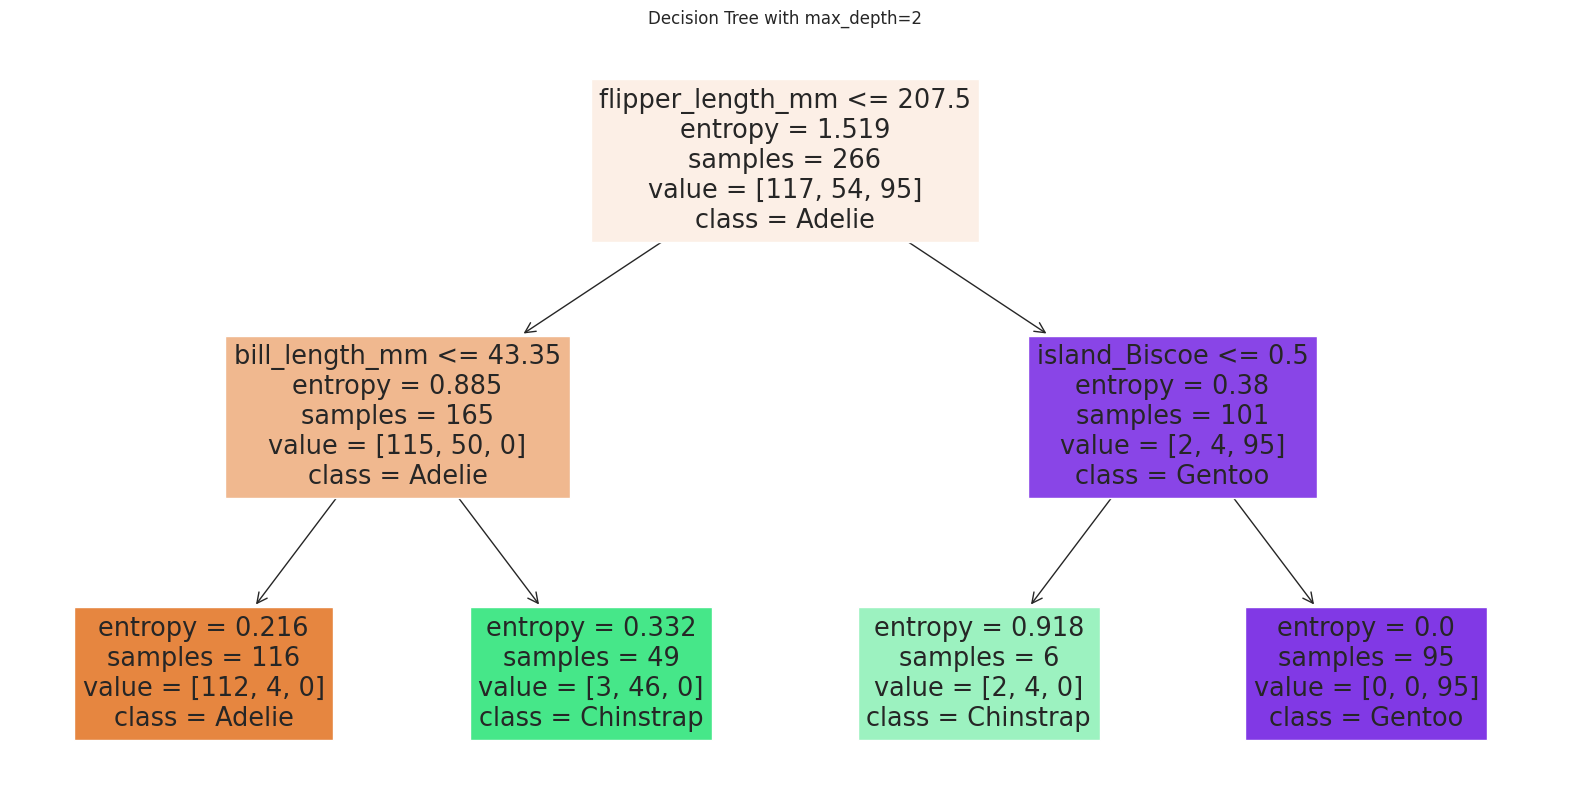

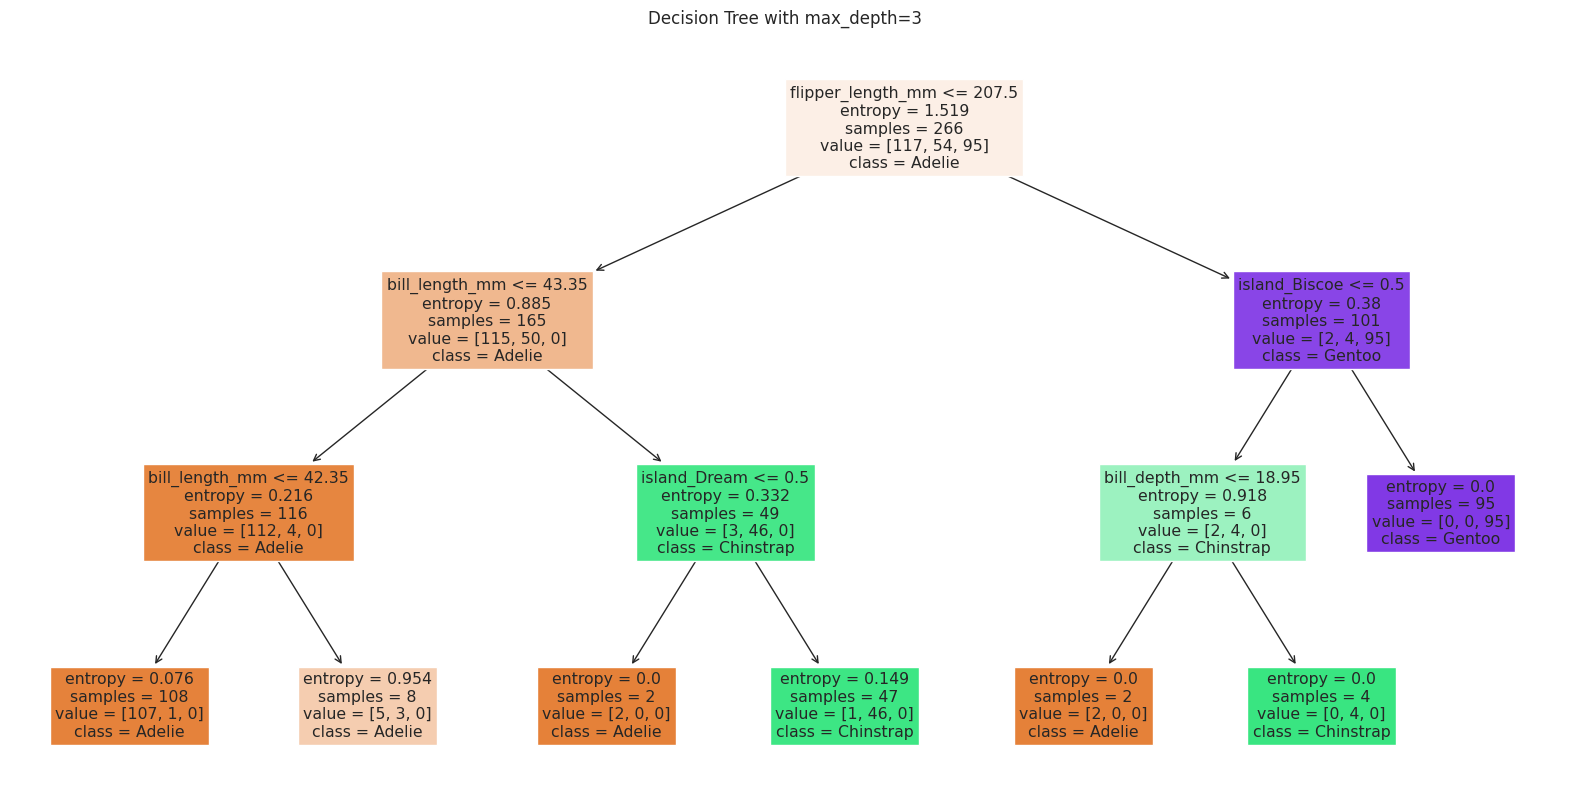

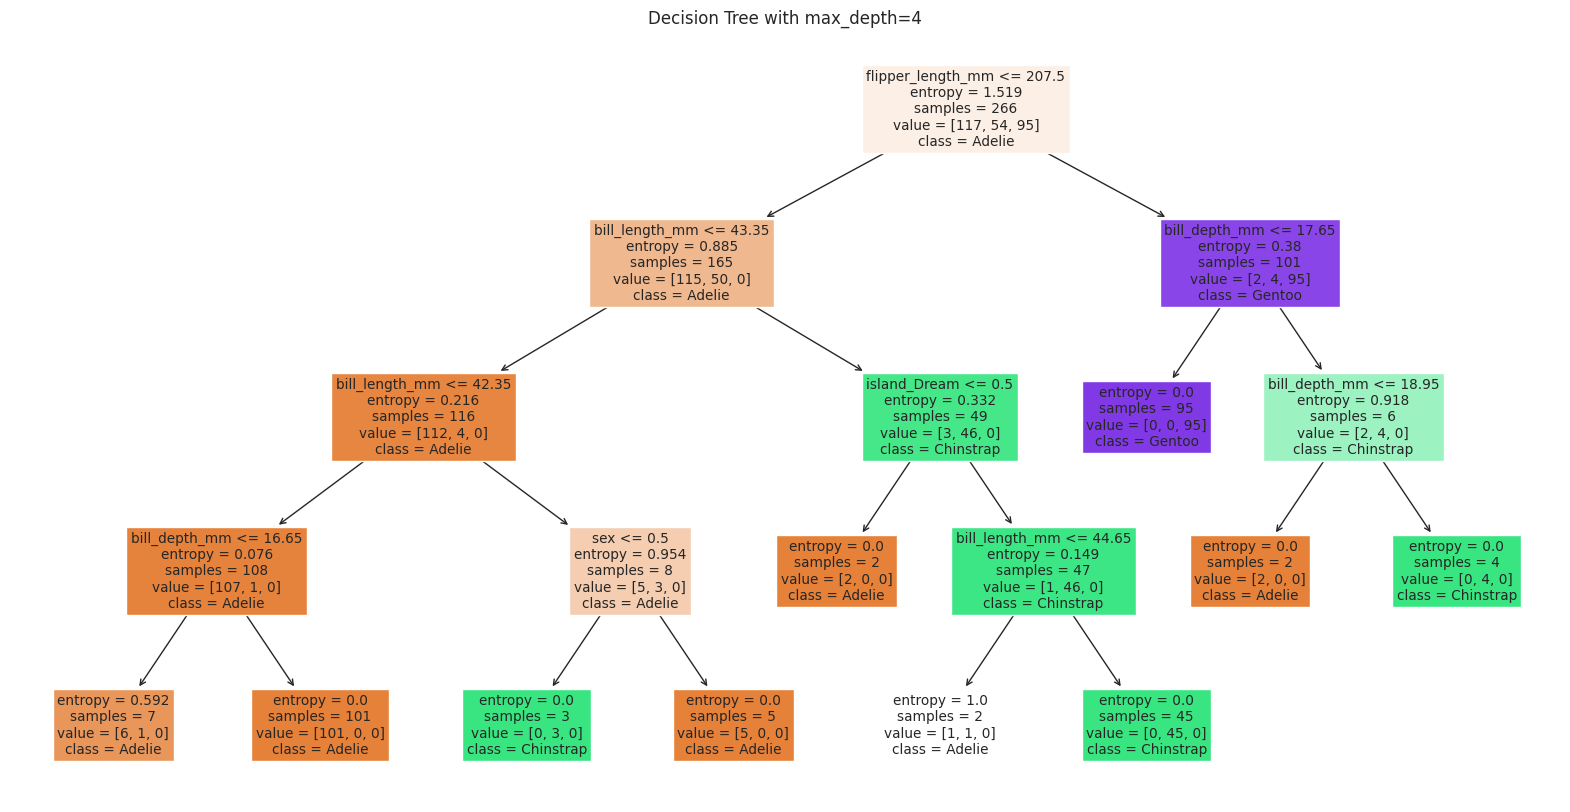

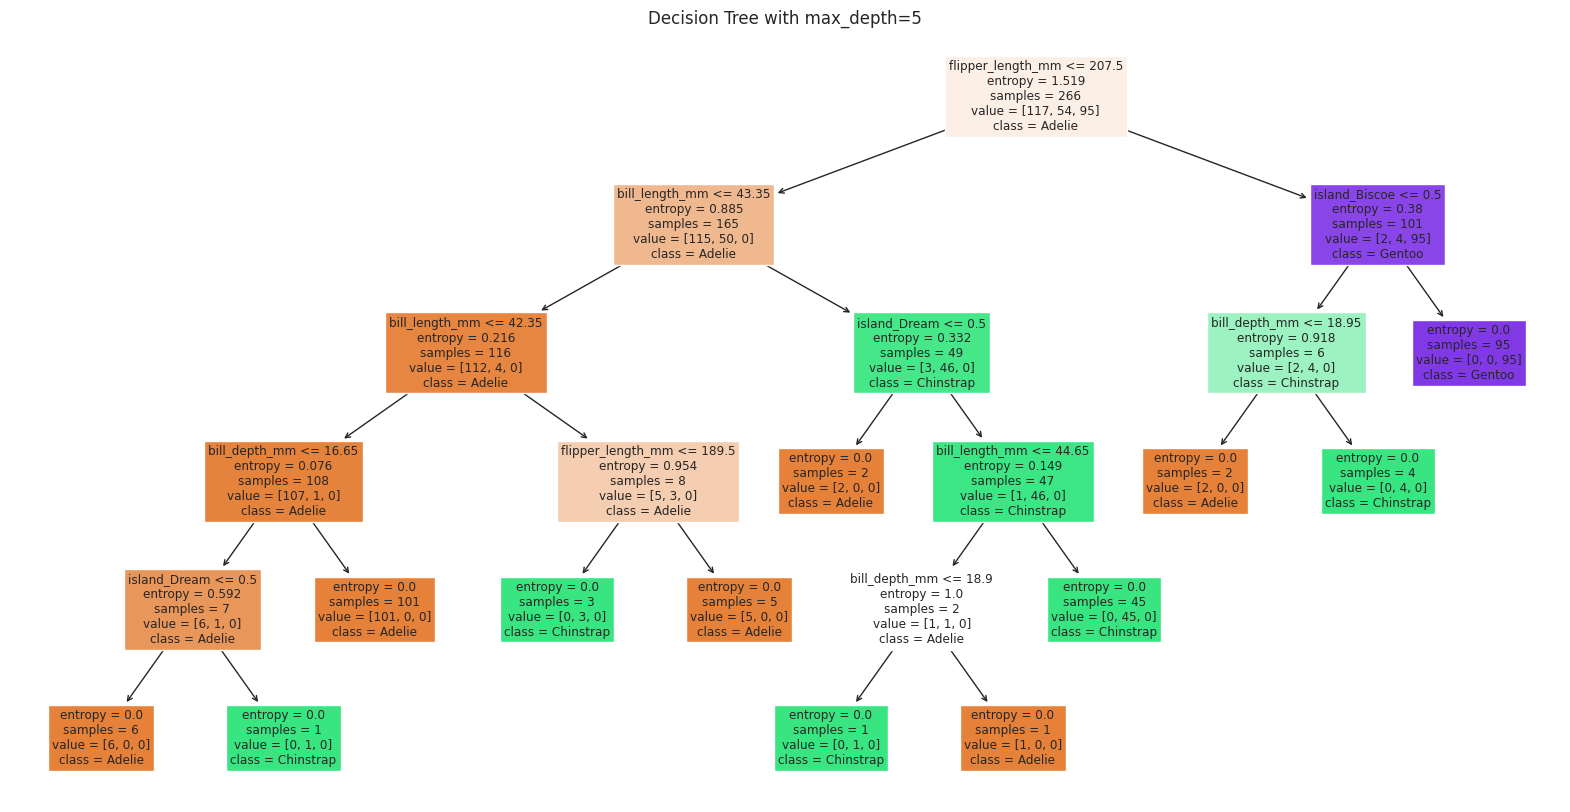

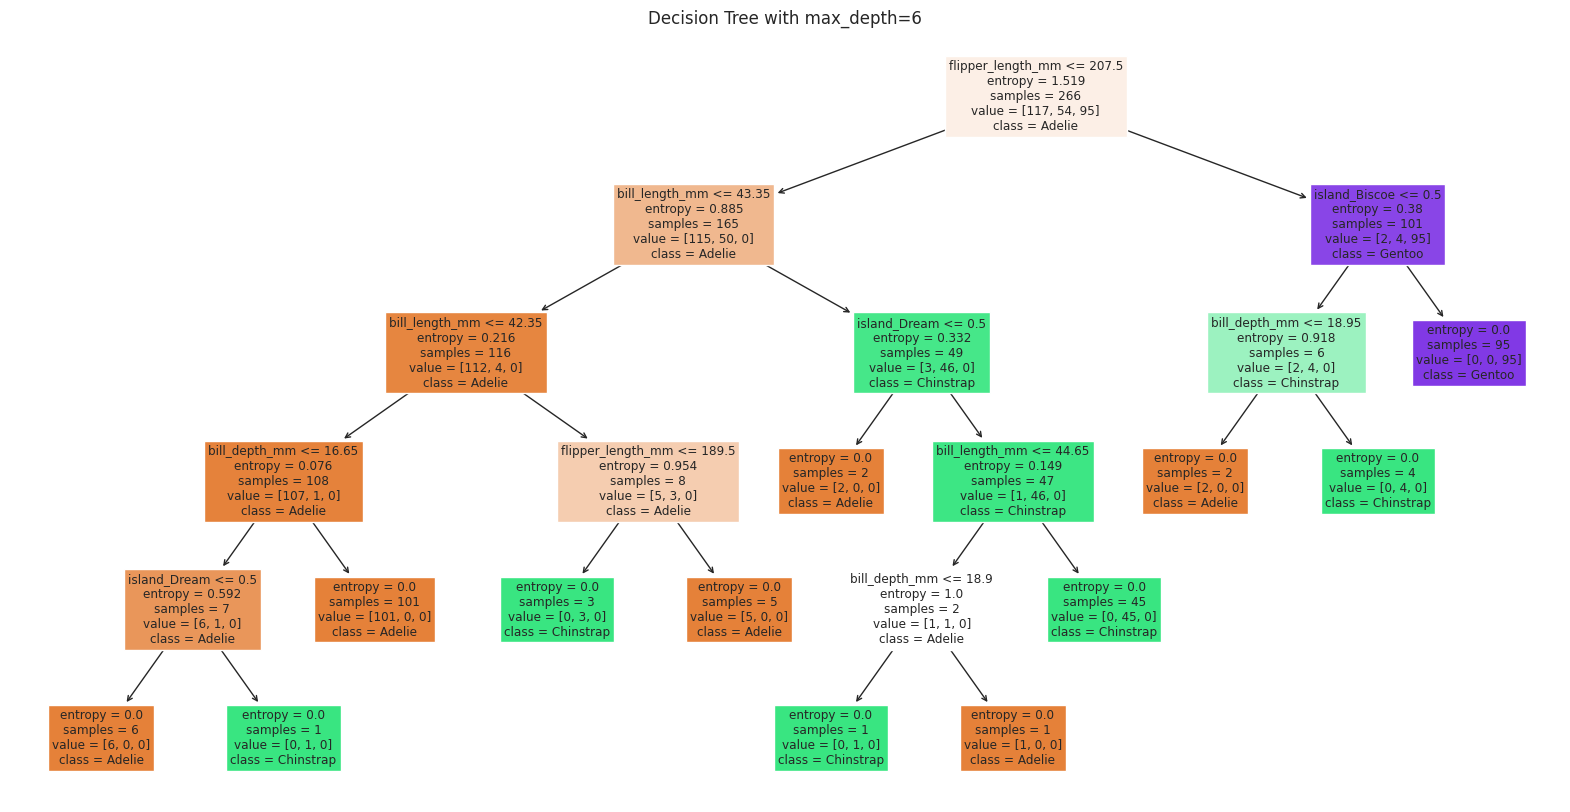

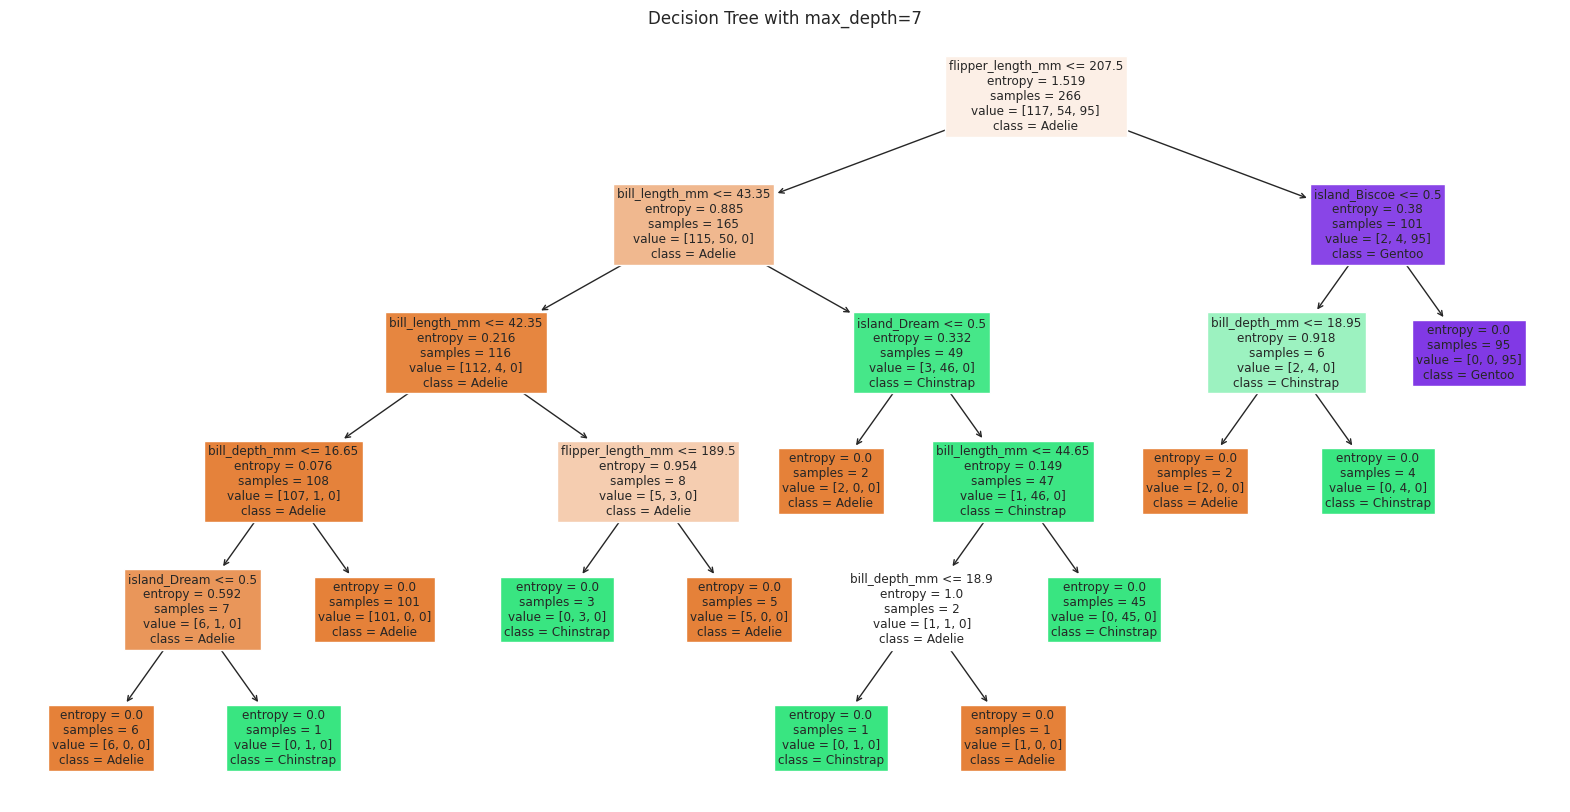

In [13]:
for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(feature_train, label_train)
    y_pred = clf.predict(feature_test)
    acc = accuracy_score(label_test, y_pred)
    accuracies.append(acc)
    
    plt.figure(figsize=(20,10))
    plot_tree(clf, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
    plt.title(f"Decision Tree with max_depth={depth}")
    plt.show()

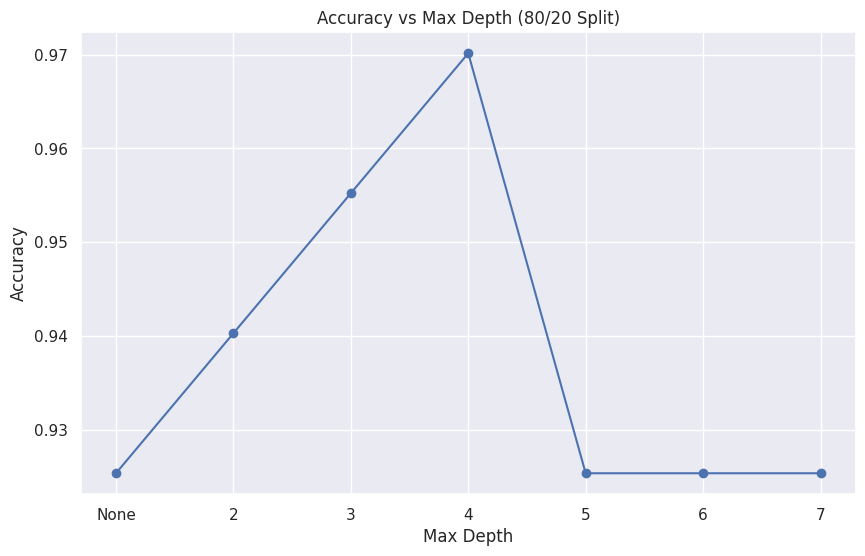

In [ ]:
depths = [None, 2, 3, 4, 5, 6, 7]
depth_labels = ['None' if d is None else str(d) for d in depths]

plt.figure(figsize=(10, 6))
plt.plot(depth_labels, accuracies, marker='o')
plt.title("Accuracy vs Max Depth (80/20 Split)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
print("\nAccuracy by max_depth:")
for d, acc in zip(['None',2,3,4,5,6,7], accuracies):
    print(f"Depth {d}: {acc:.4f}")


Accuracy by max_depth:
Depth None: 0.9254
Depth 2: 0.9403
Depth 3: 0.9552
Depth 4: 0.9701
Depth 5: 0.9254
Depth 6: 0.9254
Depth 7: 0.9254
